In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

**Читаем данные из файла**

In [3]:
df_temperature = pd.read_csv('test.csv', index_col='Unnamed: 0')

In [7]:
df_temperature.sort_values(by='Date', ascending=False)

,Date,Morning temperature,Daily temperature,Evening temperature,Night temperature
1602,2025-04-05,2,3,2,0
1585,2025-04-04,4,18,11,3
1568,2025-04-03,1,18,12,1
1551,2025-04-02,7,15,11,9
1534,2025-04-01,8,12,12,9
...,...,...,...,...,...
2039,2008-05-01,9,14,10,9
2022,2008-04-30,9,12,10,8
2005,2008-04-29,12,14,8,5
1988,2008-04-28,8,19,13,9


Проверяем есть ли nan значения, а также типы данных в стобцах

In [8]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6188 entries, 0 to 6187
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 6188 non-null   object
 1   Morning temperature  6188 non-null   int64 
 2   Daily temperature    6188 non-null   int64 
 3   Evening temperature  6188 non-null   int64 
 4   Night temperature    6188 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 290.1+ KB


Создаем столбец "Year" для дальнейшей визуализации

In [14]:
df_temperature['Year'] = pd.to_datetime(df_temperature['Date']).dt.year
df_temperature['YM'] = pd.to_datetime(df_temperature['Date']).dt.strftime('%Y-%m')

In [15]:
df_temperature

,Date,Morning temperature,Daily temperature,Evening temperature,Night temperature,Year,YM
0,2025-01-01,2,3,4,3,2025,2025-01
1,2024-01-01,-1,-2,-4,-1,2024,2024-01
2,2023-01-01,6,9,8,6,2023,2023-01
3,2022-01-01,3,4,0,3,2022,2022-01
4,2021-01-01,2,1,1,2,2021,2021-01
...,...,...,...,...,...,...,...
6183,2012-12-31,1,1,1,-1,2012,2012-12
6184,2011-12-31,0,0,0,0,2011,2011-12
6185,2010-12-31,-5,-8,-7,-10,2010,2010-12
6186,2009-12-31,-7,-5,-5,-8,2009,2009-12


Строим график среднемесячной дневной температуры за последние три года

In [31]:
df_temperature_mean = (
    df_temperature
    .groupby('YM')
    .agg({'Daily temperature':'mean'})
    .reset_index()
)
df_temperature_mean['Daily temperature'] = df_temperature_mean['Daily temperature'].round(1)
df_temperature_mean['Year'] = pd.to_datetime(df_temperature_mean['YM']).dt.year
df_temperature_mean['Month'] = pd.to_datetime(df_temperature_mean['YM']).dt.month

In [32]:
df_temperature_mean

,YM,Daily temperature,Year,Month
0,2008-04,15.2,2008,4
1,2008-05,14.6,2008,5
2,2008-06,20.1,2008,6
3,2008-07,21.8,2008,7
4,2008-08,21.6,2008,8
...,...,...,...,...
200,2024-12,1.0,2024,12
201,2025-01,1.9,2025,1
202,2025-02,-1.5,2025,2
203,2025-03,8.9,2025,3


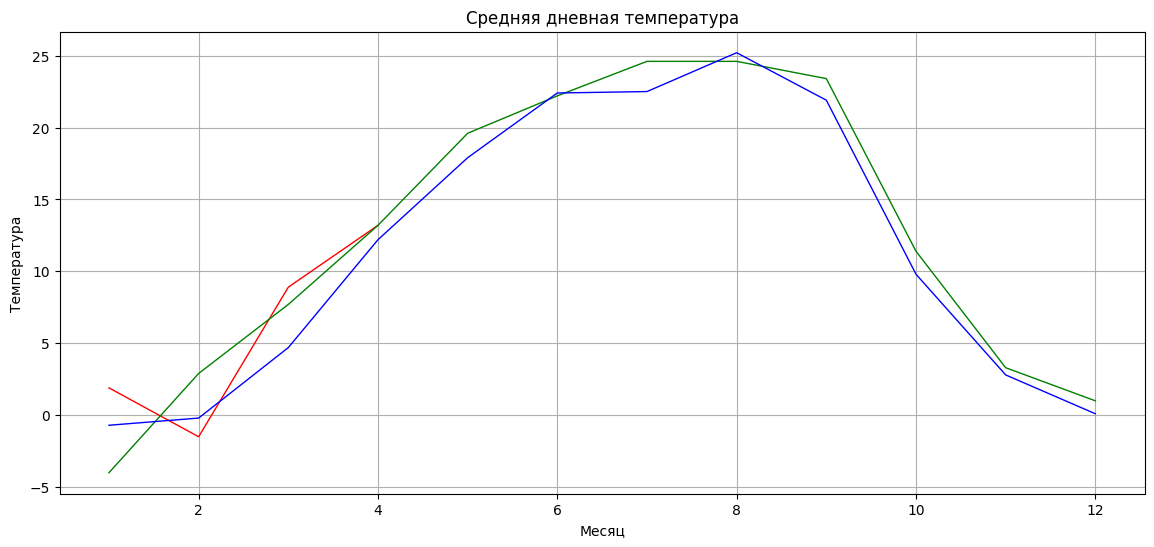

In [36]:
plt.figure(figsize=(14,6))
plt.plot(df_temperature_mean.loc[df_temperature_mean['Year']==2025, 'Month'], df_temperature_mean.loc[df_temperature_mean['Year']==2025, 'Daily temperature'], linewidth=1, color='red')
plt.plot(df_temperature_mean.loc[df_temperature_mean['Year']==2024, 'Month'], df_temperature_mean.loc[df_temperature_mean['Year']==2024, 'Daily temperature'], linewidth=1, color='green')
plt.plot(df_temperature_mean.loc[df_temperature_mean['Year']==2023, 'Month'], df_temperature_mean.loc[df_temperature_mean['Year']==2023, 'Daily temperature'], linewidth=1, color='blue')
plt.title('Средняя дневная температура')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.grid(True)
plt.show()